# CS 171 Problem set 1, Question 3

 - You may add cells to define functions or break up your solutions into components (your answers do not have to fit in a single cell each)
 - Your code can be specific to this example; it does not have to be general or be decomposed into functions
 - Feel free to include markdown cells to explain you answers
 - Do **not** import any other packages
 - Be sure to answer all parts

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# helpful plotting function for later
# assumes that w has the coefficients for the polynomial
# y = w[0] + w[1]*x + w[2]*(x**2) + x[3]*(x***3)
# plots between x=minx and x=maxx
def plotcubic(minx,maxx,w):
    xs = np.linspace(minx,maxx,50)
    ys = w[0]+w[1]*xs + w[2]*xs*xs + w[3]*xs*xs*xs
    plt.plot(xs,ys,'k-')

In [3]:
# the data (one feature, one output, for regression)
X = np.array([0,2,2,3,-1,1])
Y = np.array([1,-3,-2,-3,-1,-1])

<div class="alert alert-info"><font size=5>Part (a) Using the data above, fit a 3rd-degree polynomial (3 pts)</font>

 - Find the weights using least squares regression
 - Show your steps in the notebook, using numpy for your calculations
 - **Your code should print the coefficients**
 </div>

In [4]:
### YOUR CODE HERE
tempX = np.mat(X)
#make X into a matrix includes X_0, X, X^2, X^3
newX = np.array([[1.0,tempX[0,0],np.square(tempX[0,0]),pow(tempX[0,0],3)],
                 [1.0,tempX[0,1],np.square(tempX[0,1]),pow(tempX[0,1],3)],
                 [1.0,tempX[0,2],np.square(tempX[0,2]),pow(tempX[0,2],3)],
                 [1.0,tempX[0,3],np.square(tempX[0,3]),pow(tempX[0,3],3)],
                 [1.0,tempX[0,4],np.square(tempX[0,4]),pow(tempX[0,4],3)],
                 [1.0,tempX[0,5],np.square(tempX[0,5]),pow(tempX[0,5],3)],])
mX = np.mat(newX)
mY = np.mat(Y)
#caculate the w by using the formula w = A^(-1)*c
w = np.dot(np.linalg.inv(np.dot(mX.T,mX)),np.dot(mX.T,mY.T))
print("The coefficients are:")
print(w)

The coefficients are:
[[ 0.74193548]
 [-0.23387097]
 [-1.51612903]
 [ 0.39516129]]


<div class="alert alert-info"><font size=5>Part (b) Plot the data and cubic (3 pts)</font>

 - make a single plot plotting the data (use `plt.scatter`) and the cubic function (use `plt.plot`)
 - The x-axis range of your plot should be from -2 to 4
 - **Your code should draw a 2d figure, with the points and the cubic function**
 </div>

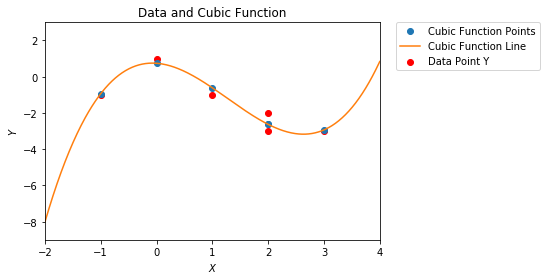

In [5]:
### YOUR CODE HERE
#sort the points generated by cubic function
newY = np.dot(mX,w)
temp = np.array([[tempX[0,0],newY[0,0]],
                [tempX[0,1],newY[1,0]],
                [tempX[0,2],newY[2,0]],
                [tempX[0,3],newY[3,0]],
                [tempX[0,4],newY[4,0]],
                [tempX[0,5],newY[5,0]]])
temp = temp[np.lexsort(temp[:,::-1].T)]

#create and set the plot
fig,ax = plt.subplots()
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
plt.xlim(-2,4)
plt.ylim(-9,3)
ax.set_title("Data and Cubic Function")

#plot the data
ax.scatter(X,Y,c = 'r',marker = 'o',label = 'Data Point Y')

#plot the point from the cubic function
ax.plot(temp[:,0],temp[:,1],'o',label = 'Cubic Function Points')

#plot the graphic of the cubic function
x = np.linspace(-2,4,500)
x_2 = pow(x,2)
x_3 = pow(x,3)
x_0 = pow(x,0)
x = np.mat(x)
x = x.T
x_0 = np.mat(x_0)
x_0 = x_0.T
x_2 = np.mat(x_2)
x_2 = x_2.T
x_3 = np.mat(x_3)
x_3 = x_3.T
newx = np.c_[x_0,x,x_2,x_3]
y = np.dot(newx,w)
plt.plot(x,y,label = 'Cubic Function Line')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show() 

<div class="alert alert-info"><font size=5>Part (c) Now repeat the same two steps, with ridge regression (4 pts)</font>

- Again, fit a cubic function, but use ridge regression with $\lambda=5$<br>
- Again, plot the data and cubic function (again over the range $x \in [-2,4]$)
- **Your code should display the coefficients (like part a) _and_ display the plot (like part b)**
</div>

The new coefficients are:
[[-0.31969248]
 [-0.18651361]
 [-0.40469707]
 [ 0.04448824]]


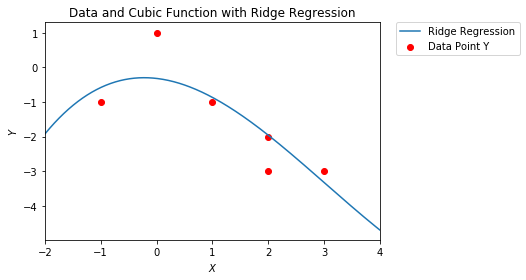

In [6]:
### YOUR CODE HERE
I = [[0,0,0,0],
     [0,1,0,0],
     [0,0,1,0],
     [0,0,0,1]]
ld = 5
neww = np.dot(np.linalg.inv(np.dot(mX.T,mX) + np.dot(ld,I)),np.dot(mX.T,mY.T))
print("The new coefficients are:")
print(neww)
newy = np.dot(newx,neww)

#####Those codes are basically the same with Part(b)
#create and set the plot
fig,ax1 = plt.subplots()
ax1.set_xlabel('$X$')
ax1.set_ylabel('$Y$')
plt.xlim(-2,4)
ax1.set_title("Data and Cubic Function with Ridge Regression")

#plot the data
ax1.scatter(X,Y,c = 'r',marker = 'o',label = 'Data Point Y')

#plot the point from the cubic function
#ax1.plot(temp[:,0],temp[:,1],'o',label = 'Cubic Function Points')

#plot the graphic of the cubic function
plt.plot(x,newy,label = 'Ridge Regression')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show() 